# Questions before making data visualizations:
1. What is the average house price vs. # of bedrooms?
2. What is the House Distribution in King County by Zipcode
3. What is the average house price vs. area house distribution?

In [1]:
# Data Preprocessing

# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import geopandas as gpd

In [2]:
# Importing the dataframe
df = pd.read_csv('C:/Capstone1/KC_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,ZIPCODE,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
ZIPCODE          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


# 1. What is the average house price vs. # of bedrooms?

(0, 3500000)

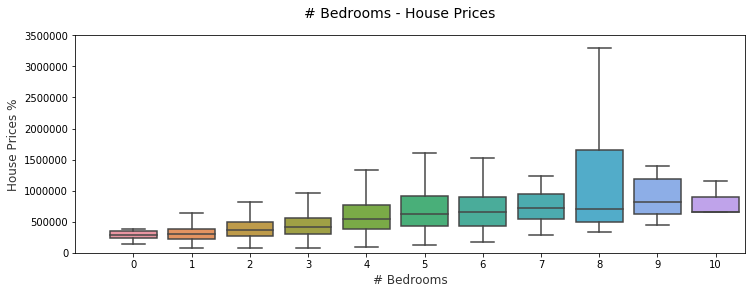

In [4]:
# Box Plot
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('# Bedrooms - House Prices', fontsize=14)

sns.boxplot(x="bedrooms", y="price", data=df, ax=ax, showfliers=False)
ax.set_xlabel("# Bedrooms",size = 12,alpha=0.8)
ax.set_ylabel("House Prices %",size = 12,alpha=0.8)
plt.xlim(-1,10.5)
plt.ylim(0,3500000)

This boxplot shows that there is a linear correlation between number of bedrooms and house prices until about 5 bedrooms. After 5 bedrooms, the results vary widely whether or not bedrooms play a key factor in how expensive a house is. Outliers were removed with "showfliers=False" and axes were adjusted to show main data. 

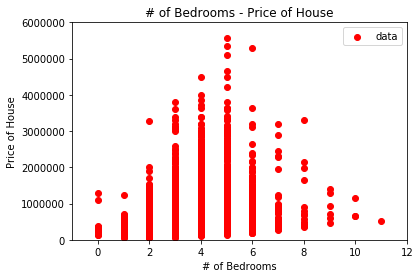

In [5]:
# Scatter Plot
plt.scatter(df['bedrooms'], df['price'], label='data', color='red', marker='o')
plt.legend(loc='upper right')
plt.xlabel('# of Bedrooms')
plt.ylabel('Price of House')
plt.title('# of Bedrooms - Price of House')
plt.xlim(-1,12)
plt.ylim(0,6000000)
plt.show()

This scatterplot shows that there is a linear correlation between number of bedrooms and house prices until about 5 bedrooms. After 5 bedrooms, the results vary widely whether or not bedrooms play a key factor in how expensive a house is. Axes were adjusted to show main data. 

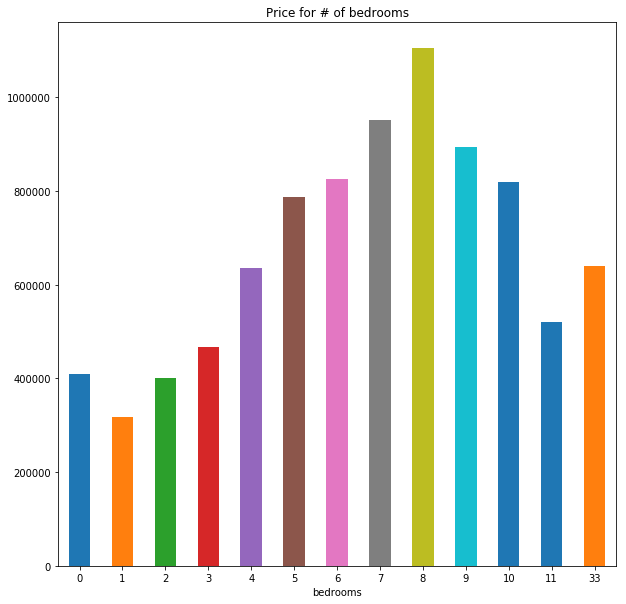

In [24]:
df.groupby('bedrooms')['price'].mean().plot(kind='bar', title = 'Price for # of bedrooms', rot=0)
# Conclusion: The price for 8 bedrooms is highest, and price for one bedroom is lowest.

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

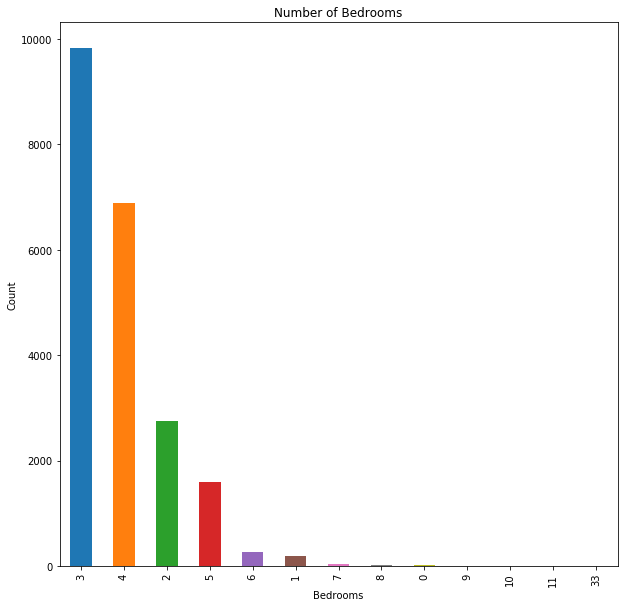

In [22]:
df['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

From the above visualization, we can see that the most common number of bedrooms in a home is 3 bedrooms. 
This is followed by 4, 2, 5, 6, bedroom houses. 

# 2. What is the House Distribution in King County by Zipcode?

In [6]:
# How many houses are in each zipcode?
df['ZIPCODE'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
98118    508
98023    499
98006    498
98133    494
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    410
98056    406
98053    405
98001    362
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98004    317
98199    317
        ... 
98168    269
98112    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    234
98105    229
98045    221
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    118
98109    109
98102    105
98010    100
98024     81
98148     57
98039     50
Name: ZIPCODE, Length: 70, dtype: int64

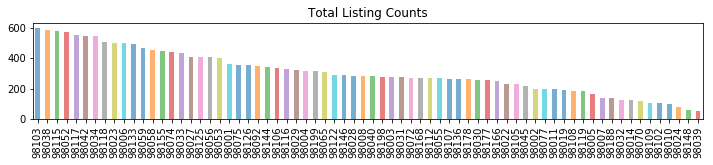

In [7]:
zip_counts = df['ZIPCODE'].value_counts(dropna=False)
plt.subplot(3,1,1)
zip_counts.plot(kind='bar', title='Total Listing Counts', alpha = 0.6, figsize=(12,6))

In [8]:
# Group by ZIPCODE 
group = df.groupby(['ZIPCODE']).mean()

In [9]:
# Import King County Shapefile for Zipcode Map 
%matplotlib inline
import geopandas as gpd
kc = gpd.read_file('C:/zipcode.shp')

In [10]:
kc.head()

,ZIP,ZIPCODE,COUNTY,ZIP_TYPE,Shape_area,Shape_len,geometry
0,98031,98031,033,Standard,2.280129e+08,117508.232813,"POLYGON ((1297645.018999994 162673.5240000039,..."
1,98032,98032,033,Standard,4.826754e+08,166737.665152,(POLYGON ((1291868.054000005 164132.6790000051...
2,98030,98030,033,Standard,2.000954e+08,94409.538568,"POLYGON ((1299384.719999999 144186.7479999959,..."
3,98029,98029,033,Standard,2.774247e+08,111093.715481,"POLYGON ((1358323.971000001 215228.4819999933,..."
4,98028,98028,033,Standard,1.996531e+08,71488.230747,"POLYGON ((1297496.656000003 283648.5799999982,..."


Text(0.5,1,'House Distribution in King County by Zipcode')

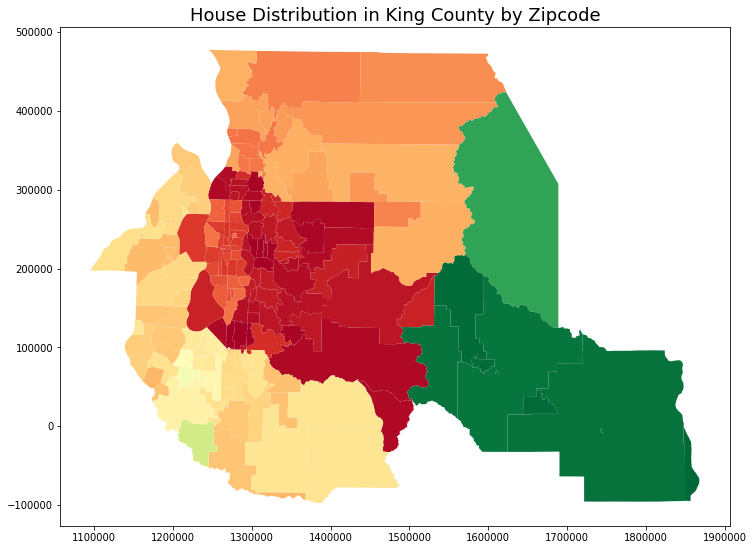

In [11]:
import matplotlib.pyplot as plt
kc.plot(column='ZIP', figsize=(12, 12), cmap='RdYlGn')
plt.title('House Distribution in King County by Zipcode', {'fontsize': 18})

The map above demonstrates that the highest concentration of homes is located closest to metropolitan Seattle.

Text(0.5,1,'House Distribution in King County by Zipcode')

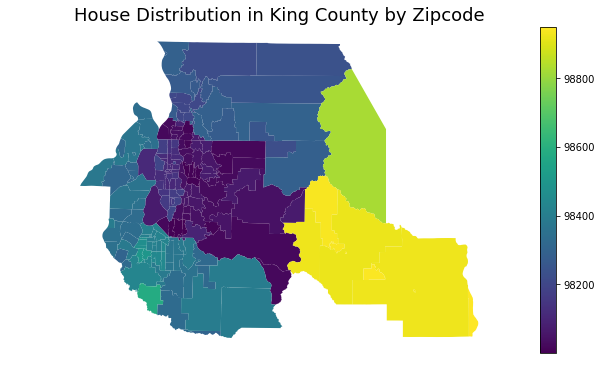

In [12]:
ax = kc.plot(column='ZIP', figsize=(15, 6), legend=True)
ax.set_axis_off()
plt.title('House Distribution in King County by Zipcode', {'fontsize': 18})

Another King County map with legend that shows the highest concentration of homes are located in the dark blue region of zipcode 98200 and below.

C:\Users\jennywhojennyvu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jennywhojennyvu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 720x720 with 0 Axes>

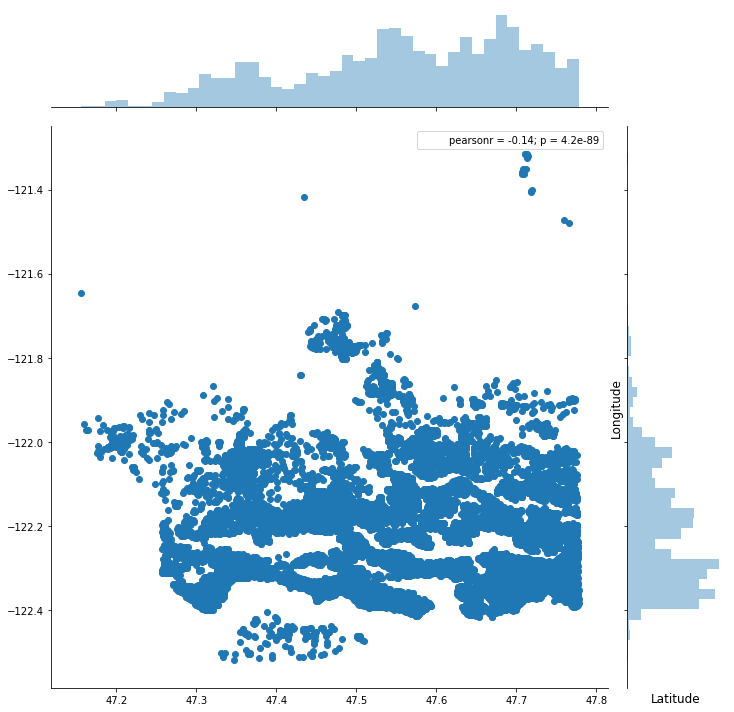

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [28]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df.lat.values, y=df.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

The figure above shows visualization of the location of homes based on longitude and latitude. 
For latitude between 47.5 and 47.75 and longitude between -122 and -122.4 there is the highest concentration of homes. 


# 3. What is the average house price vs. area house distribution?

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#Display all columns instead of "..." truncation
pd.options.display.max_columns = None

#No scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#Set plot sizes
plt.rcParams["figure.figsize"] = 10, 10

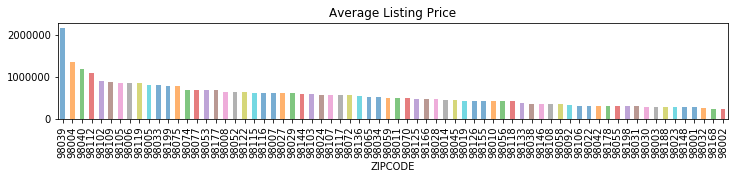

In [14]:
#Get the average price of listings in each zipcode
zip_price = df.groupby('ZIPCODE')['price'].mean().sort_values(ascending=False)
plt.subplot(3,1,2)
zip_price.plot(kind='bar', title = 'Average Listing Price', alpha = 0.6, figsize=(12,6))

In [15]:
# Convert house dataframe to geodataframe for plotting 
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
crs = {'init': 'epsg:4269'}
df_geo = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

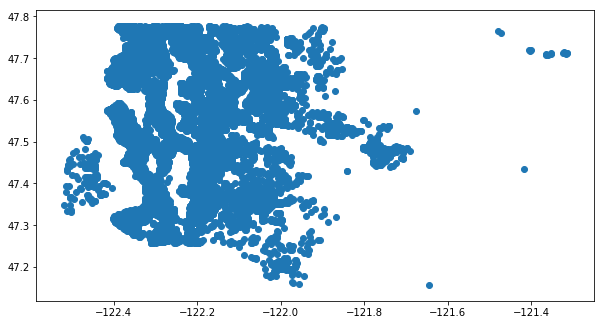

In [16]:
# Plot latitude and longitude 
df_geo.plot()

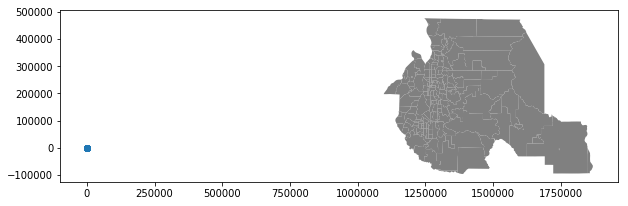

In [17]:
# Trying to plot latitude and longitude on top of shapefile 
# Unable to merge because error message "UserWarning: CRS of frames being joined does not match!"
df_geo.plot(ax=kc.plot(facecolor='gray'))
plt.show()

C:\Users\jennywhojennyvu\Anaconda3\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


Text(0.5,1,'Average listing price by latitude/longitude')

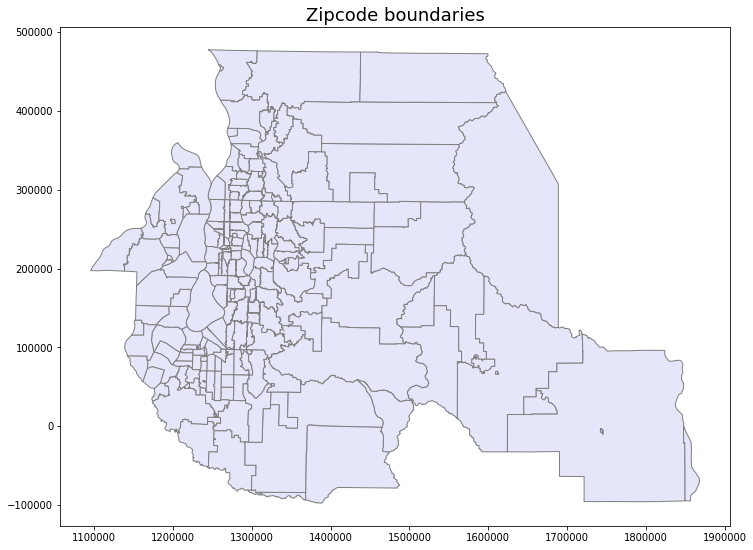

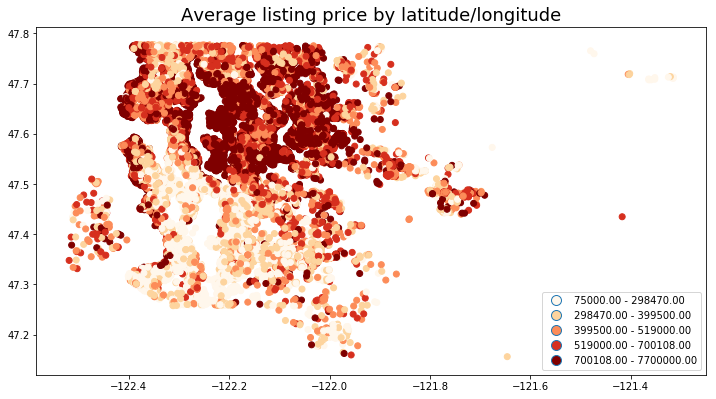

In [18]:
base = kc.plot(color='lavender', edgecolor='grey', figsize=(12,12))
plt.title('Zipcode boundaries', {'fontsize': 18})
df_geo.plot(column='price', cmap='OrRd', figsize=(12,12), scheme='quantiles', legend=True)
plt.title('Average listing price by latitude/longitude', {'fontsize': 18})

1.) The top figure shows the different zipcode boundaries of King County. 

2.) The bottom figure shows the average listing price by latitude/longitude. 
As you can see, the closer the house is to metropolitan Seattle, the higher 
the average listing price. 

In [41]:
# Merging the 2 data frames together 
frames = [df,kc]
result = pd.concat(frames)
result.head()

C:\Users\jennywhojennyvu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


,COUNTY,Shape_area,Shape_len,ZIP,ZIPCODE,ZIP_TYPE,bathrooms,bedrooms,condition,date,floors,geometry,grade,id,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated
0,NaN,nan,nan,nan,98178,NaN,1.000,3.000,3.000,20141013T000000,1.000,POINT (-122.257 47.5112),7.000,7129300520.000,47.511,-122.257,221900.000,1180.000,0.000,1180.000,1340.000,5650.000,5650.000,0.000,0.000,1955.000,0.000
1,NaN,nan,nan,nan,98125,NaN,2.250,3.000,3.000,20141209T000000,2.000,POINT (-122.319 47.721),7.000,6414100192.000,47.721,-122.319,538000.000,2170.000,400.000,2570.000,1690.000,7242.000,7639.000,0.000,0.000,1951.000,1991.000
2,NaN,nan,nan,nan,98028,NaN,1.000,2.000,3.000,20150225T000000,1.000,POINT (-122.233 47.7379),6.000,5631500400.000,47.738,-122.233,180000.000,770.000,0.000,770.000,2720.000,10000.000,8062.000,0.000,0.000,1933.000,0.000
3,NaN,nan,nan,nan,98136,NaN,3.000,4.000,5.000,20141209T000000,1.000,POINT (-122.393 47.5208),7.000,2487200875.000,47.521,-122.393,604000.000,1050.000,910.000,1960.000,1360.000,5000.000,5000.000,0.000,0.000,1965.000,0.000
4,NaN,nan,nan,nan,98074,NaN,2.000,3.000,3.000,20150218T000000,1.000,POINT (-122.045 47.6168),8.000,1954400510.000,47.617,-122.045,510000.000,1680.000,0.000,1680.000,1800.000,8080.000,7503.000,0.000,0.000,1987.000,0.000


In [56]:
# Convert the merged house dataframe to geodataframe for plotting 
geo = [Point(xy) for xy in zip(result['long'], result['lat'])]
crs = {'init': 'epsg:4269'}
result_geo = gpd.GeoDataFrame(result, crs=crs, geometry=geometry)

# Inferential Statistics

In [87]:
# Mean of houses in King County
price = df['price']
print('King County mean of houses is', price.mean())

King County mean of houses is 540182.1587933188


In [91]:
# Draw a sample of size 10 from the data
sample = np.random.choice(price, size=10)

In [92]:
# t-test
#The sample mean(x̄)
mean = np.mean(sample)
print('The sample mean is', mean)

The sample mean is 390145.8


(array([1.9021e+04, 2.1420e+03, 3.2200e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <a list of 1 Patch objects>)

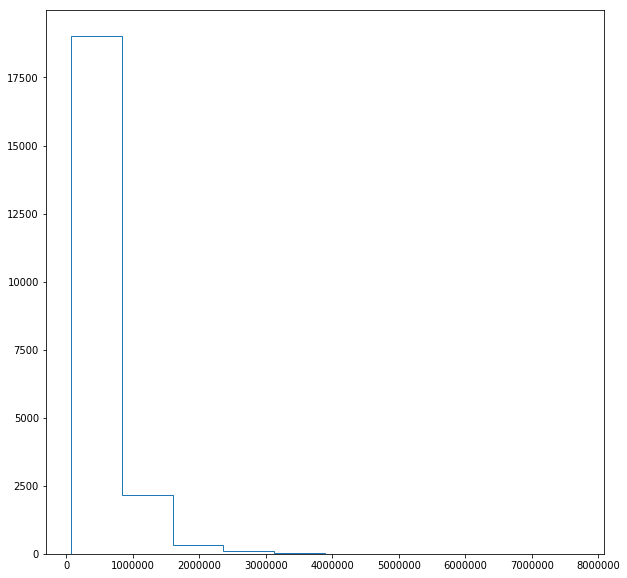

In [89]:
# Make a histogram of the price data to observe if distribution of home prices in King County is normal 
plt.hist(df['price'], bins=10, histtype='step')